In [125]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
from rxn_ca.core import ReactionResult
from rxn_ca.reactions import ReactionLibrary
from rxn_ca.computing.schemas.ca_result_schema import RxnCAResultDoc
from rxn_ca.analysis.bulk_reaction_analyzer import BulkReactionAnalyzer, ReactionStepAnalyzer
from rxn_ca.core.heating import HeatingSchedule, HeatingStep

from pylattica.core import Simulation
from pylattica.structures.square_grid.structure_builders import SimpleSquare3DStructureBuilder

In [266]:
test = "experiment-2024-01-12-173953.json"

In [267]:
test_analyzer = BulkReactionAnalyzer.from_result_doc_file(test)
result_doc = RxnCAResultDoc.from_file(test)
rxn_lib = result_doc.reaction_library
phase_set = rxn_lib.phases
step_analyzer = ReactionStepAnalyzer(phase_set)

Constructing result from diffs: 100%|█| 357787/357787 [00:01<00:
Constructing result from diffs: 100%|█| 357787/357787 [00:01<00:
Constructing result from diffs: 100%|█| 357787/357787 [00:01<00:


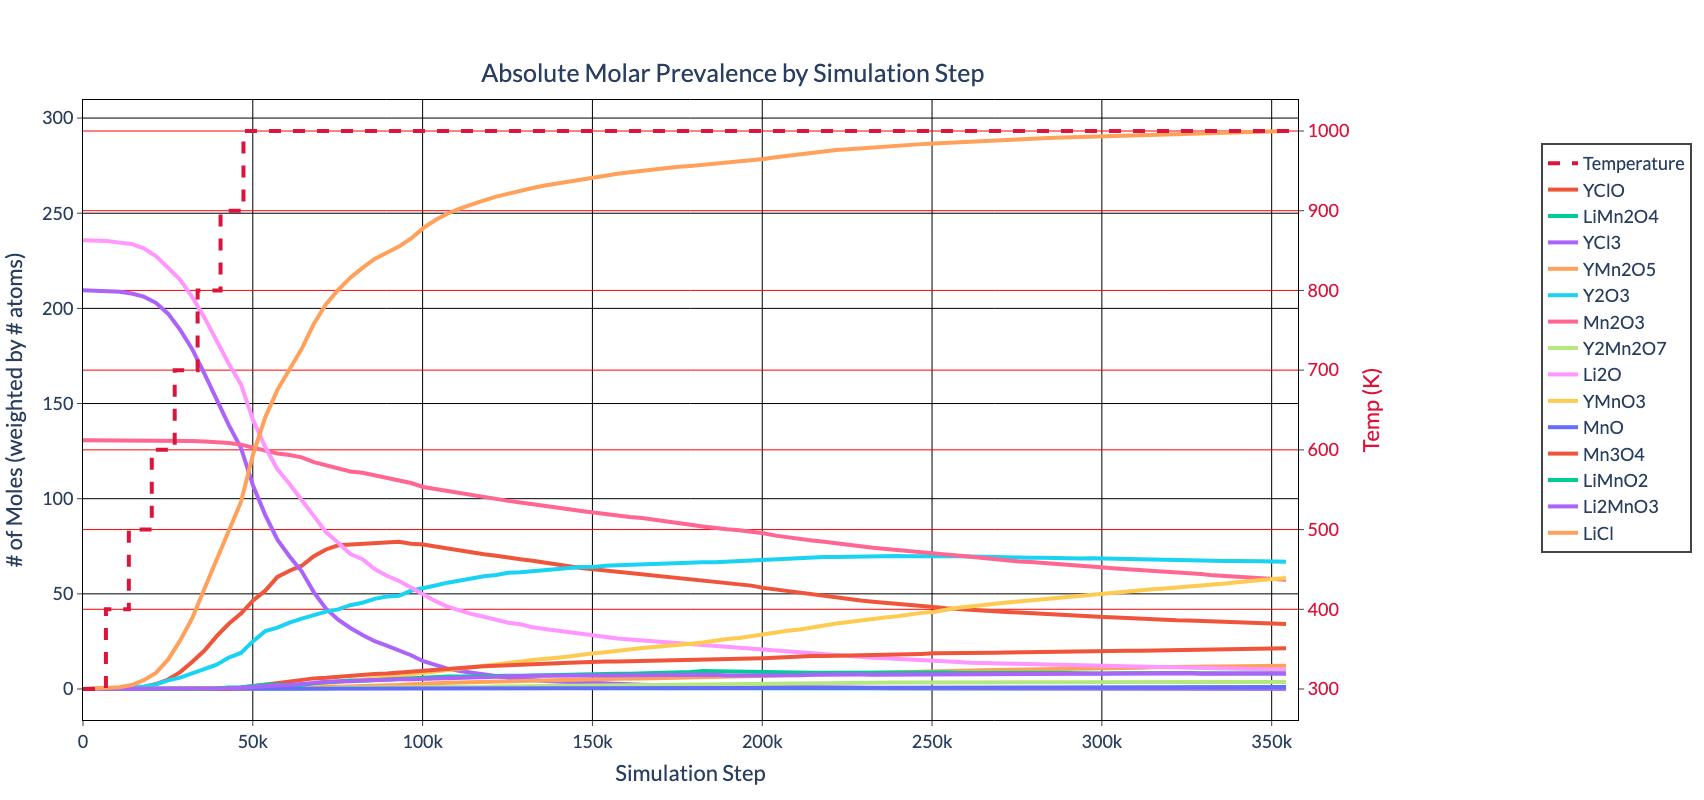

In [268]:
test_analyzer.plot_molar_phase_amounts(xrd_adjust=True)

Notes: No sign of Y3O4Cl - it's not in materials project

LiYO2 and Mn8Cl3O10 appear here, but are not mentioned in the paper



Constructing result from diffs: 100%|█| 155267/155267 [00:00<00:
Constructing result from diffs: 100%|█| 155267/155267 [00:00<00:
Constructing result from diffs: 100%|█| 155267/155267 [00:00<00:


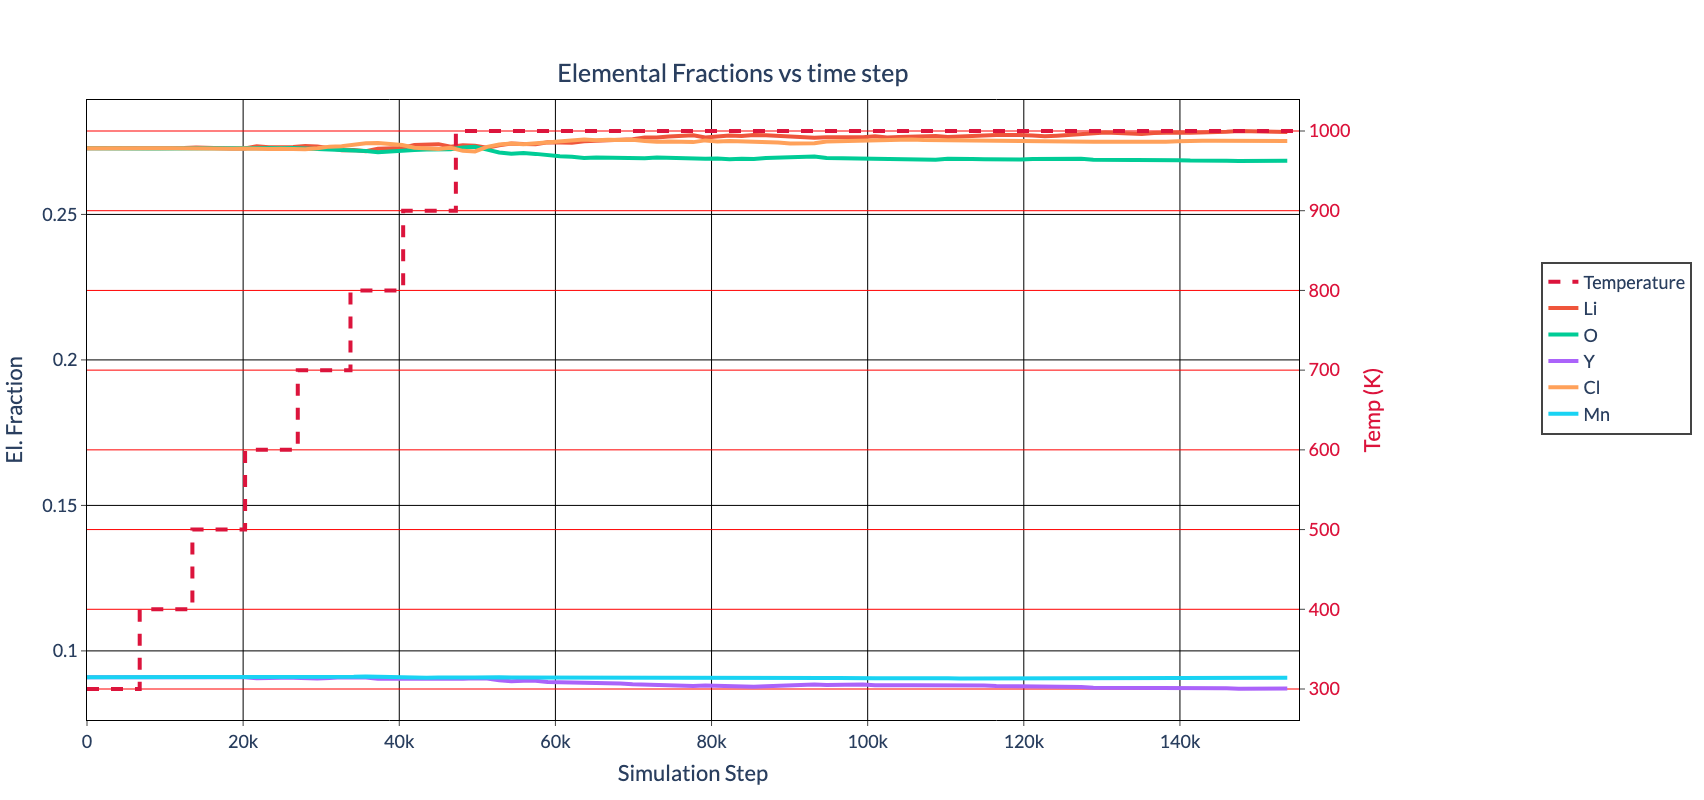

In [265]:
test_analyzer.plot_elemental_fractions()

In [254]:
s = test_analyzer.get_steps(1000000)

In [255]:
s[0].get_general_state()

{'MELTED_AMTS': {'LiCl': 2760.4644093557217},
 'VOL_MULTIPLIER': 0.3676487189591351,
 'GASES_EVOLVED': {},
 'GASES_CONSUMED': {},
 'TEMPERATURE': 1000}

In [7]:
broken_analyzer = BulkReactionAnalyzer.from_result_doc_file(broken)

NameError: name 'broken' is not defined

In [ ]:
broken_analyzer.plot_molar_phase_amounts(xrd_adjust=True)

In [ ]:
broken_analyzer.plot_elemental_fractions()

In [ ]:
debug_step = debug_analyzer.get_steps(0)[0]
broken_step = debug_analyzer.get_steps(0)[0]

debug_step == broken_step

In [ ]:
step = broken_analyzer.get_steps(15000)[0]
size = result_doc.recipe.simulation_size
struct = SimpleSquare3DStructureBuilder().build(size)
sim = Simulation(step, struct)

sim.to_file("initial_sim.json")

In [ ]:
rehydrate = Simulation.from_file("initial_sim.json")

In [ ]:
state = rehydrate.state

In [ ]:
for i in state.site_ids():
    state.set_site_state(i, { "VOLUME": 1.0 })

In [ ]:
sim = Simulation(state, struct)
sim.to_file("initial_sim_vols_one.json")

In [ ]:
rehydrate2 = Simulation.from_file("initial_sim_vols_one.json")

In [ ]:
step_analyzer.molar_breakdown(analyzer.get_steps(15000))

In [ ]:
analyzer.plot_elemental_amounts()

In [ ]:
analyzer.molar_breakdown(158000)

In [ ]:
steps = analyzer.get_steps(140000)

In [ ]:
for s in steps[0].all_site_states():
    vol = s['VOLUME']
    if vol != 1.0:
        print(vol)

In [ ]:
from rxn_ca.analysis import ReactionStepAnalyzer

In [ ]:
single_result = result_doc.results[0]
analyzer = ReactionAnalyzer(single_result, result_doc.reaction_library.phases, result_doc.recipe.heating_schedule)
step_analyzer = ReactionStepAnalyzer(result_doc.reaction_library.phases)

In [ ]:
step_phase1 = single_result.get_step(5000)
step_phase2 = single_result.get_step(15000)

In [ ]:
step_analyzer.total_volume(step_phase1, include_melted=False)

In [ ]:
step_phase2.get_general_state()

In [ ]:
# where is the melted volume??

In [ ]:
step_analyzer.total_volume(step_phase2, include_melted=False)

In [ ]:
rxns = result_doc.reaction_library

In [ ]:
last_step_group = analyzer.get_last_step_group()
step_analyzer = BulkReactionStepAnalyzer(result_doc.reaction_library.phases)
step_analyzer.molar_breakdown(last_step_group)

In [ ]:
for r in rxns.get_rxns_at_temp(800).search_all(["Mn8Cl3O10"], ["YCl3"]):
    print(r)

In [ ]:
from plotly import subplots

trace_top = analyzer.get_molar_phase_traces(phases=["Li2O", "LiCl"], xrd_adjust=False, legend="legend1")
trace_mid = analyzer.get_molar_phase_traces(phases=["Mn2O3", "Mn3O4", "YMnO3"], xrd_adjust=False, legend="legend2")
trace_bottom = analyzer.get_molar_phase_traces(phases=["YCl3", "YClO", "Y2O3", "YMnO3"], xrd_adjust=False, legend="legend3")

In [ ]:
from plotly import graph_objects as go
from plotly.graph_objs.layout import YAxis,XAxis,Margin


In [ ]:
class MultiPathPlotter():
    
    def __init__(self, analyzer):
        self.analyzer = analyzer
    
    def draw_pathways(self, pathways, xrd_adjust=True):
        trace_groups = []
        for pathway in pathways:
            trace_group = self.analyzer.get_molar_phase_traces(phases=pathway, xrd_adjust=xrd_adjust)
            trace_groups.append((pathway, trace_group))
            
        layout = self.get_layout()
        
        for i in range(0, len(trace_groups)):
            if i == 0:
                x_ax_key = 'xaxis'
                y_ax_key = 'yaxis'
            else:
                x_ax_key
        
    
    def get_layout(self):
        return go.Layout(
            title={
                'text' : "Absolute Prevalence by Step",
                'x':0.43,
                'y': 0.92,
                'xanchor': 'center'
            },
            paper_bgcolor='rgba(0,0,0,0)', 
            plot_bgcolor='rgba(0,0,0,0)',
            width=700, height=800,
            legend=dict(
                x=1.02,
                y=0.6,
                borderwidth=2
            ),
            font=dict(
                family="Lato",
                size=18,
            )            
        )

In [ ]:
layout = go.Layout(
            title={
                # 'text' : "Absolute Prevalence by Step",
                'x':0.43,
                'y': 0.92,
                'xanchor': 'center'
            },
            paper_bgcolor='rgba(0,0,0,0)', 
            plot_bgcolor='rgba(0,0,0,0)',
            width=700, height=800,
            xaxis3=XAxis(
                title="Simulation Step",
                range=[0, 870000],
                gridcolor='black',
                mirror=True,
                ticks='outside',
                showline=True,
                linecolor='black',
                zerolinecolor='black'
            ),
            xaxis2=XAxis(
                range=[0, 870000],
                gridcolor='black',
                mirror=True,
                ticks='outside',
                showline=True,
                linecolor='black',
                zerolinecolor='black'
            ),
            xaxis=XAxis(
                range=[0, 870000],
                gridcolor='black',
                ticks='outside',
                showline=True,
                linecolor='black',
                zerolinewidth=3,
                mirror=True,
                zerolinecolor='black',
            ),
            yaxis=YAxis(
                gridcolor='black',
                range=(0, None),
                side='left',
                showline=True,
                showgrid=False,
                mirror=True,                
                linecolor='black',
                showticklabels=False,
            ),
            yaxis2=YAxis(
                title=dict(
                    text='Amount',
                ),
                gridcolor='black',
                range=(0, None),
                side='left',
                showline=True,
                showgrid=False,
                mirror=True,                
                linecolor='black',
                showticklabels=False,
            ),
            yaxis3=YAxis(
                gridcolor='black',
                range=(0, None),
                side='left',
                showline=True,
                showgrid=False,
                mirror=True,
                linecolor='black',
                showticklabels=False,
            ),
            legend1=dict(
                x=1.02,
                y=0.90,
                borderwidth=2
            ),
            legend2=dict(
                x=1.02,
                y=0.5,
                borderwidth=2
            ),
            legend3=dict(
                x=1.02,
                y=0.08,
                borderwidth=2
            ),
            font=dict(
                family="Lato",
                size=18,
            )            
        )

In [ ]:
fig = subplots.make_subplots(rows=3, cols=1, 
                             shared_xaxes=True,
                             vertical_spacing=0.00
)

fig.update_layout(layout)

for idx, t in enumerate(trace_top):
    curr_phase = t.name
    inc = int(len(t.x) / (len(trace_top) + 1))
    colors = {
        "Li2O": "rgb(223,96,40)",
        "LiCl": "rgb(238,184,63)",
        "LiMnO2": "rgb(85,136,88)"
    }
    
    label_offsets = {
        "Li2O": 10
    }
    t.line.color = colors[curr_phase]
    fig.append_trace(t,row=1,col=1)
    pos = int(inc * (idx + 1)) + label_offsets.get(curr_phase, 0)
    fig.add_annotation(x=t.x[pos], y=t.y[pos],
                text=curr_phase,
                showarrow=True,
                arrowhead=1, row=1,col=1)
    
    
for idx, t in enumerate(trace_mid):
    curr_phase = ["Mn2O3", "Mn3O4", "YMnO3"][idx]
    
    colors = {
        "Mn2O3": "rgb(87,156,181)",
        "Mn3O4": "darkgreen",
        "YMnO3": "rgb(68,8,245)"
    }
    
    label_offsets = {
        "Mn3O4": 40,
        "Mn2O3": 15
    }
    label_ys = {
        "Mn3O4": -60,
        "Mn2O3": 40
    }


    t.line.color = colors[curr_phase]
    t.textfont.color = colors[curr_phase]

    inc = int(len(t.x) / (len(trace_mid) + 1))
    fig.append_trace(t,row=2,col=1)
    pos = int(inc * (idx + 1)) + label_offsets.get(curr_phase, 0)
    fig.add_annotation(x=t.x[pos], y=t.y[pos],
                text=curr_phase,
                showarrow=True,
                ay=label_ys.get(curr_phase, -30),
                arrowhead=1, row=2,col=1)    

for idx, t in enumerate(trace_bottom):
    curr_phase = t.name
    colors = {
        "YCl3": "rgb(151,33,39)",
        "YClO": "rgb(194,41,52)",
        "Y2O3": "rgb(70,50,165)",
        "YMnO3": "rgb(68,8,245)"
    }
    
    label_offsets = {
        "Y2O3": -20
    }
    
    label_ys = {
        "Y2O3": -25
    }
    
    t.line.color = colors[curr_phase]

    inc = int(len(t.x) / (len(trace_bottom) + 1))
    fig.append_trace(t,row=3,col=1)
    pos = int(inc * (idx + 1)) + label_offsets.get(curr_phase, 0)
    fig.add_annotation(x=t.x[pos], y=t.y[pos],
                text=curr_phase,
                showarrow=True,
                ay=label_ys.get(curr_phase, -30),
                arrowhead=1, row=3,col=1)        


fig.show()